## Problem Statement:
    A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
    Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

    About the data: 
    Let’s consider a Company dataset with around 10 variables and 400 records. 
    The attributes are as follows: 
     Sales -- Unit sales (in thousands) at each location
     Competitor Price -- Price charged by competitor at each location
     Income -- Community income level (in thousands of dollars)
     Advertising -- Local advertising budget for company at each location (in thousands of dollars)
     Population -- Population size in region (in thousands)
     Price -- Price company charges for car seats at each site
     Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
     Age -- Average age of the local population
     Education -- Education level at each location
     Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
     US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

In [2]:
df = pd.read_csv('D:\ExcelR\Data Science\Assignments related\CSV\Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.shape

(400, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
# Changing the categorical columns into numeric one 
company = pd.get_dummies(df)
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [6]:
#Applying the Low/Mid and High category to each data point as defined in the problem statement
#-> company is interested to know about the segment or attributes causes high sale
company['Category'] = pd.cut(company['Sales'], 
                        bins=[0,10, np.inf], 
                        labels=['Low/Mid','High'],
                        include_lowest=True)

company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Category
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,Low/Mid
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Low/Mid
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low/Mid


In [7]:
# So the applied category here is Y variable and rest all are X variables, hence applying the LableEncoding to Y
label_encoder = preprocessing.LabelEncoder()
company['Category']= label_encoder.fit_transform(company['Category']) 

In [8]:
# Now Seperating X & Y 
X = company.iloc[:,1:15]
Y = company.iloc[:,15]

In [9]:
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [10]:
Y.head()

0    1
1    0
2    0
3    1
4    1
Name: Category, dtype: int32

In [11]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

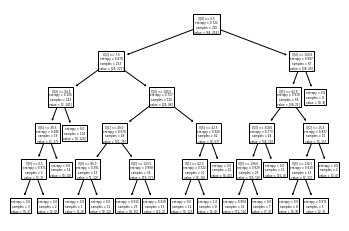

In [13]:
#PLot the decision tree
tree.plot_tree(model);

Text(0.5, 1.0, 'Decision tree using Entropy Criteria')

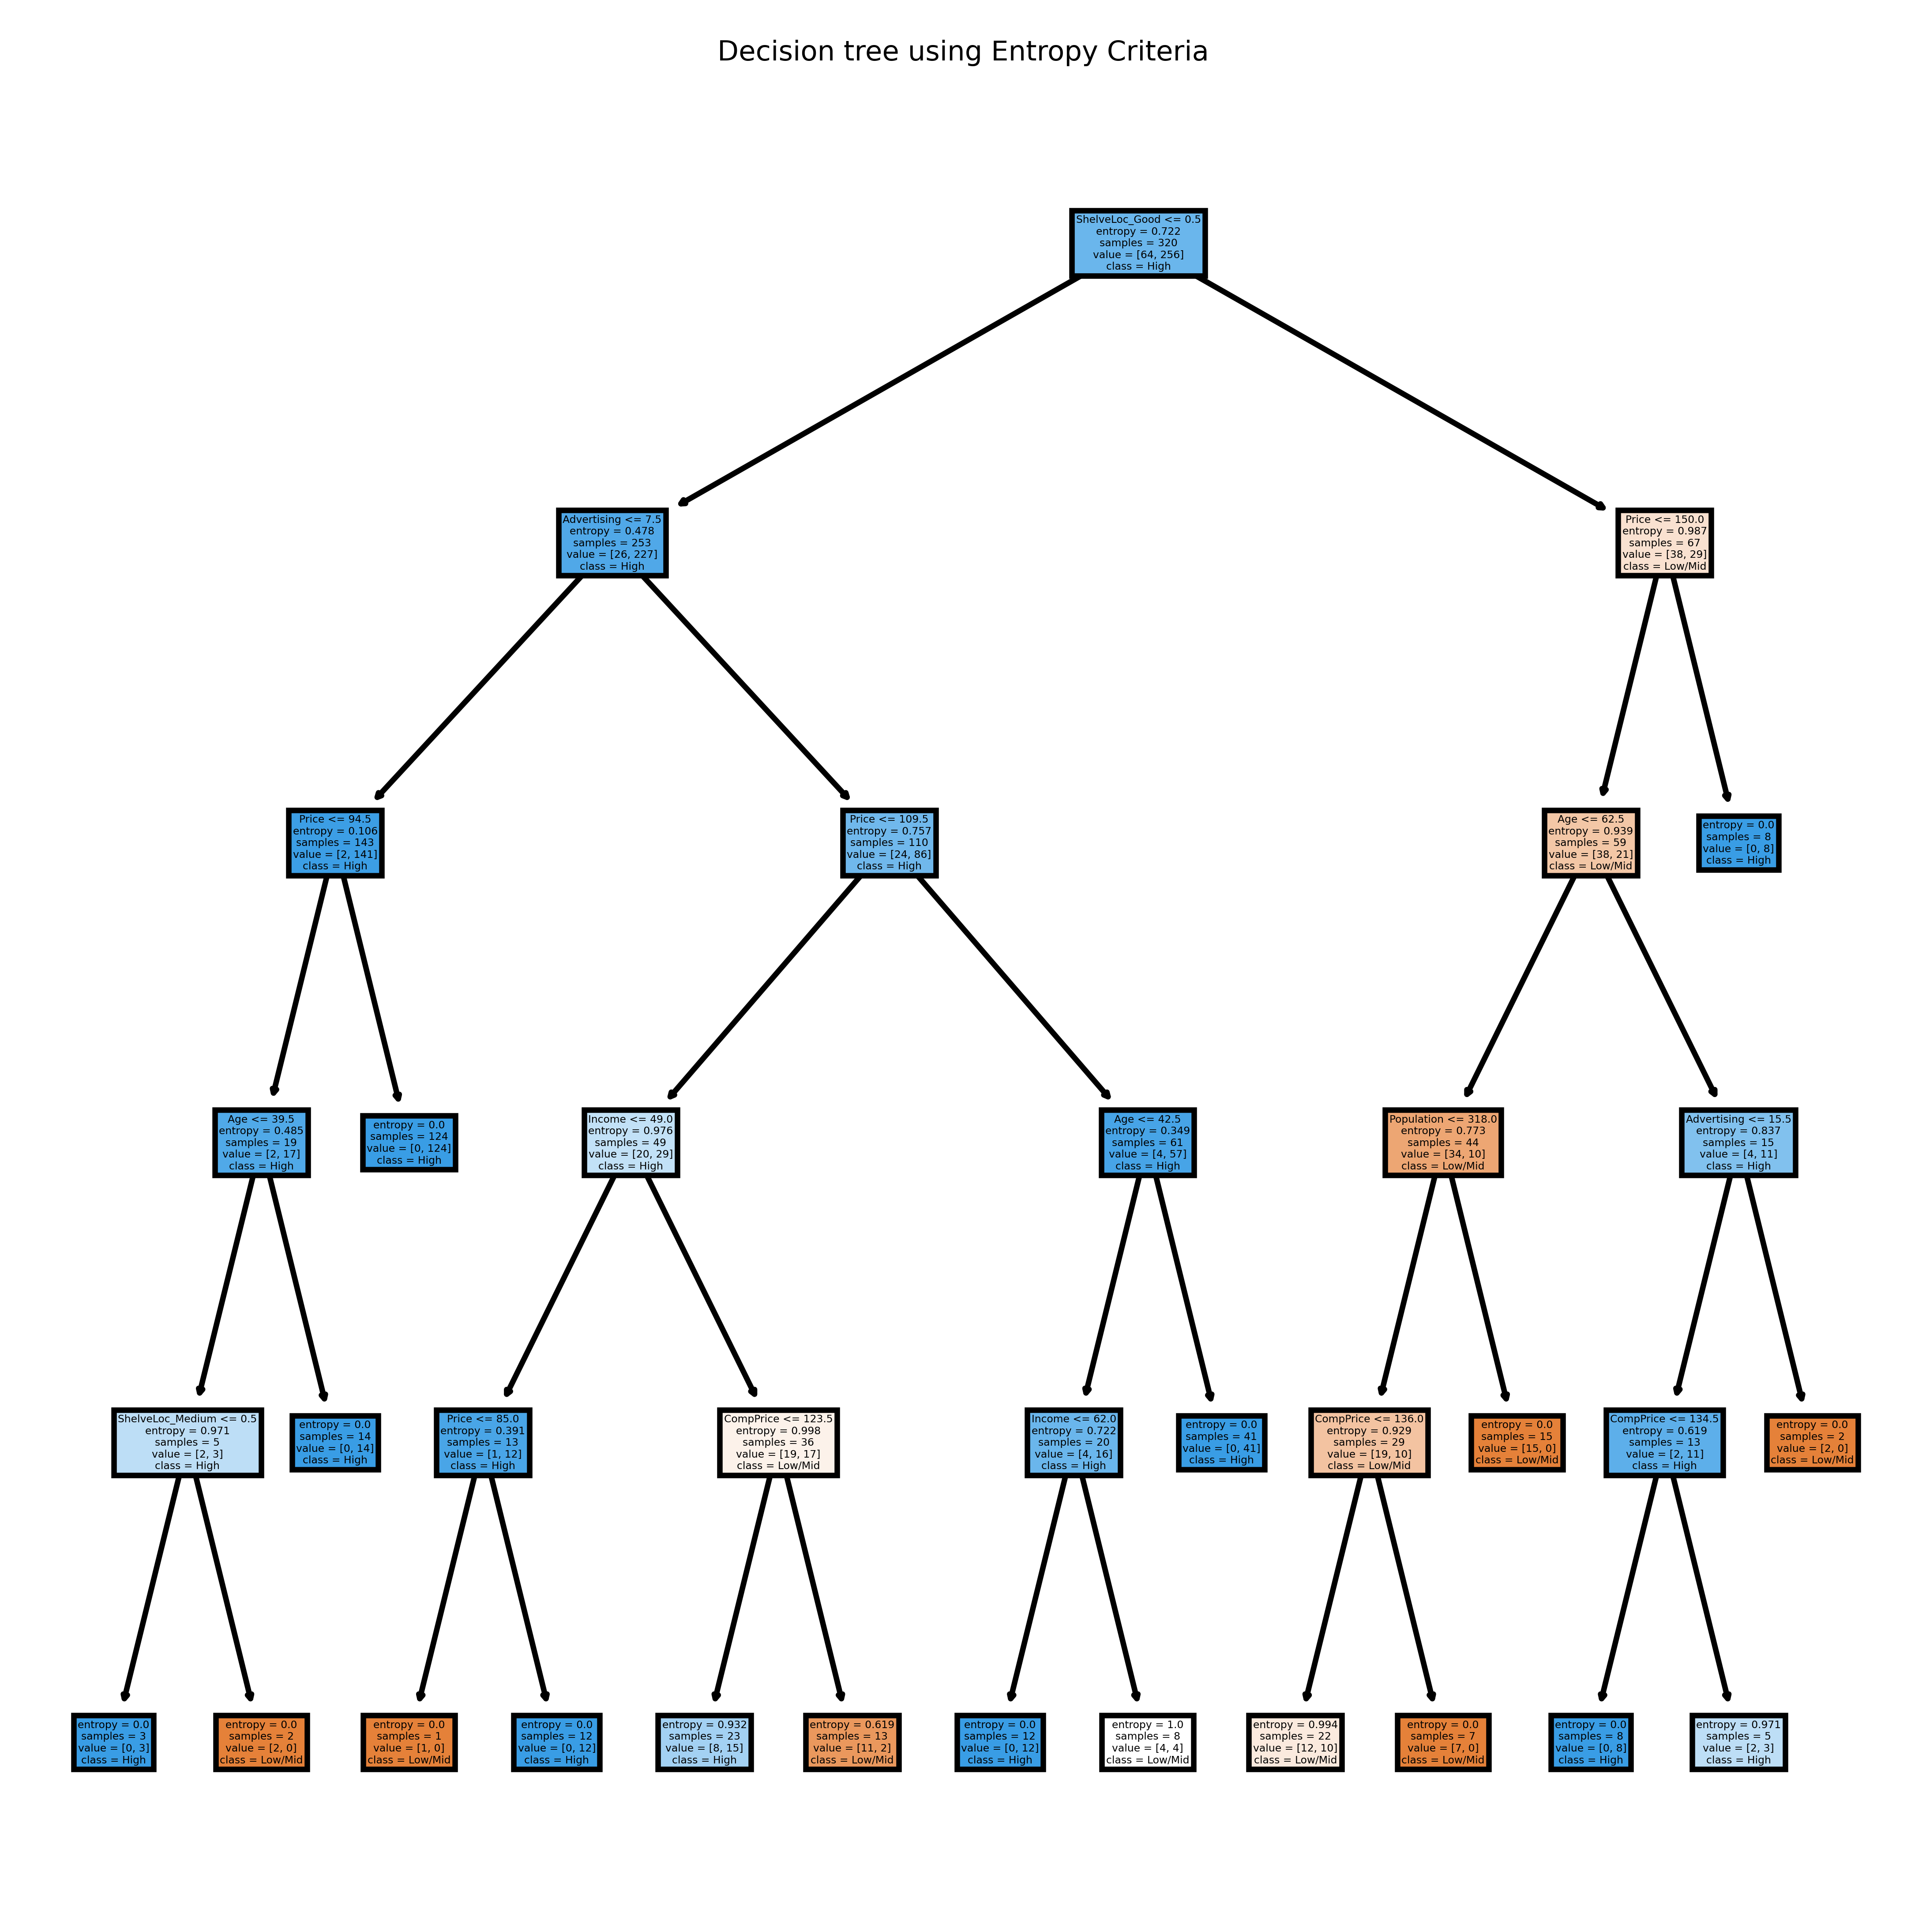

In [14]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education',
    'ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
cn=['Low/Mid', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=900)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.title('Decision tree using Entropy Criteria',fontsize=5)

In [15]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    63
0    17
dtype: int64

In [16]:
preds

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Category,,
0,9,5
1,8,58


In [18]:
# Accuracy 
np.mean(preds==y_test)

0.8375

### Building Decision Tree Classifier (CART) using Gini Criteria

In [19]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [20]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.8375

Text(0.5, 1.0, 'Decision tree using CART')

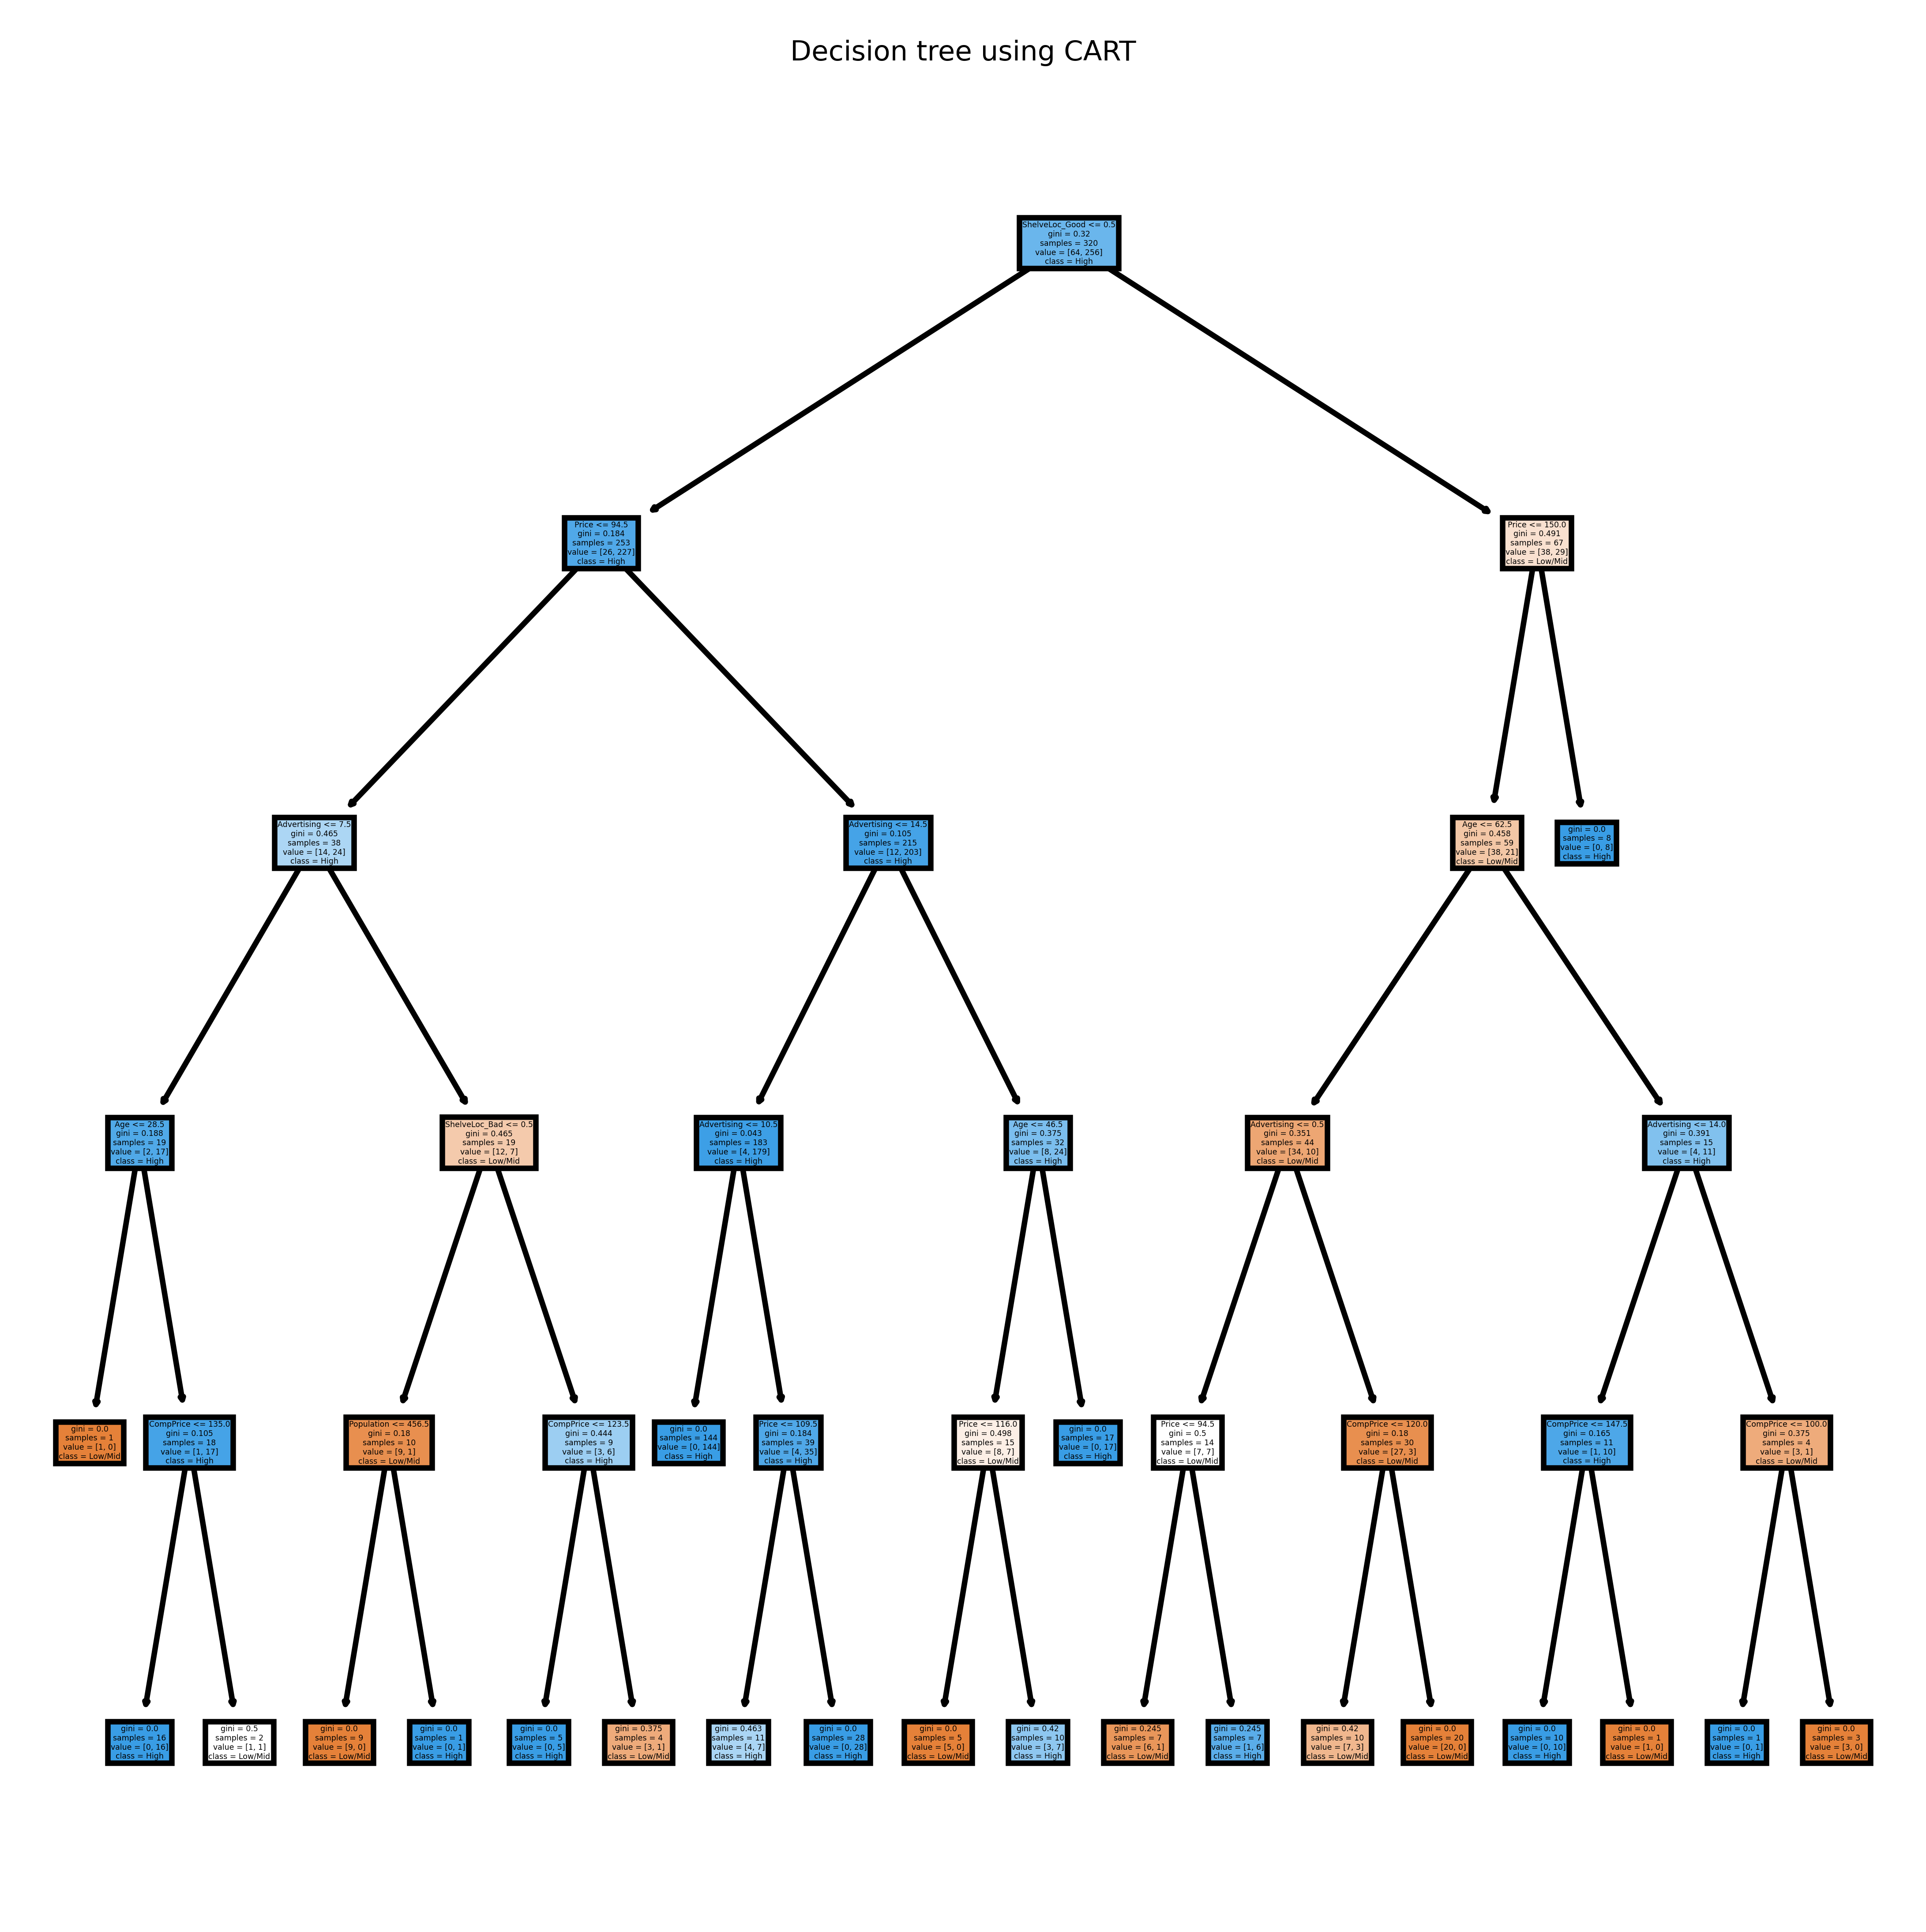

In [22]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education',
    'ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
cn=['Low/Mid', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=900)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.title('Decision tree using CART',fontsize=5)

## Looking at both the plots, we can say that following are the 3 top factors affecting the cloth manufacturing company sales:
### 1. Shelf Location at stores
### 2. Pricing
### 3. Advertising